In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
df_healthy = pd.read_csv('healthy_data.csv')
df_PD_MCI_LBD = pd.read_csv('PD_MCI_LBD_data.csv')
df_PD = pd.read_csv('PD_data.csv')
df_AD_MCI = pd.read_csv('AD_MCI_data.csv')

In [3]:
df_AD_MCI.set_index('group', inplace=True)
df_healthy.set_index('group', inplace=True)
df_PD.set_index('group', inplace=True)
df_PD_MCI_LBD.set_index('group', inplace=True)

In [4]:
# Confirm the headers of all the dataframes are the samelbist(df_AD_MCI.columns) == list(df_healthy.columns) == list(df_PD.columns) == list(df_PD_MCI_LBD.columns)

In [5]:
list_columns = list(df_AD_MCI.columns)

In [6]:
def reversed_delimited_tuple(string,delimiter='|'):
    delimited_tuple = string.split(delimiter)
    reversed_tuple = delimited_tuple[::-1]
    return reversed_tuple

In [7]:
# List proteins by last short-name identifier used in column title
list_proteins = []
for protein_string in list_columns:
    list_proteins.append(reversed_delimited_tuple(protein_string)[0])

In [8]:
# Create dictionary of extended protein info : short identifier
dict_proteins = {}
for i in range(0,len(list_proteins)):
    dict_proteins[list_columns[i]] = list_proteins[i]

In [9]:
df_AD_MCI = df_AD_MCI.rename(columns=dict_proteins)
df_healthy = df_healthy.rename(columns=dict_proteins)
df_PD = df_PD.rename(columns=dict_proteins)
df_PD_MCI_LBD = df_PD_MCI_LBD.rename(columns=dict_proteins)

In [10]:
def gen_volcano_tuple(test_frame,control_frame):
    # Returns ['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value']
    datalist = []
    
    for protein in list_proteins:
        t_stat, p_stat = scipy.stats.ttest_ind(test_frame[protein],control_frame[protein],equal_var=False)
        datalist.append([protein,test_frame[protein].mean(), control_frame[protein].mean(),
                        np.log2(test_frame[protein].mean()/control_frame[protein].mean()),
                        float(t_stat), float(np.log10(p_stat))*-1])

    return datalist

In [11]:
AD_MCI_volcano_datalist = gen_volcano_tuple(df_AD_MCI,df_healthy)
PD_volcano_datalist = gen_volcano_tuple(df_PD,df_healthy)
PD_MCI_LBD_volcano_datalist = gen_volcano_tuple(df_PD_MCI_LBD,df_healthy)
PD_vs_MCI_volcano_datalist = gen_volcano_tuple(df_PD_MCI_LBD,df_PD)

In [12]:
df_volcano_AD_MCI = pd.DataFrame(data=AD_MCI_volcano_datalist, columns=['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value'])
df_volcano_PD = pd.DataFrame(data=PD_volcano_datalist, columns=['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value'])
df_volcano_PD_MCI = pd.DataFrame(data=PD_MCI_LBD_volcano_datalist, columns=['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value'])
df_volcano_PD_MCI_vs_PD = pd.DataFrame(data=PD_vs_MCI_volcano_datalist, columns=['protein','avg_expr_cond','avg_expr_healthy','log2_FC','t_value','log10_p_value'])

In [13]:
df_volcano_AD_MCI.head(20)

,protein,avg_expr_cond,avg_expr_healthy,log2_FC,t_value,log10_p_value
0,KV37,28.625901,28.757594,-0.006622,-1.370797,0.760079
1,LV469,22.950857,23.052196,-0.006356,-0.654448,0.288264
2,LV861,23.686000,23.251352,0.026720,1.807920,1.129861
3,LVX54,20.674124,21.257603,-0.040153,-1.417459,0.793985
4,LV746,25.488773,25.680084,-0.010788,-1.470697,0.837352
5,LV218,24.301595,24.260772,0.002426,0.298124,0.115628
6,LV316,23.538795,23.424604,0.007016,0.698582,0.312088
7,LV312,22.803081,22.621808,0.011515,1.529835,0.883997
8,LV310,22.703162,22.666418,0.002337,0.218992,0.082320
9,LV39,23.772554,23.963952,-0.011569,-1.679809,1.012224


<font size=4>__Matplotlib updated!__

In [36]:
for i in range(0,df_volcano_AD_MCI.shape[0]):
    if df_volcano_AD_MCI.log2_FC[i] < -0.04 and df_volcano_AD_MCI.log10_p_value[i] > 2:
        log2_FC=df_volcano_AD_MCI.log2_FC[i]
        log10_p_value=df_volcano_AD_MCI.log10_p_value[i]
        s=df_volcano_AD_MCI.protein[i]
        print(log2_FC, log10_p_value, s)

for i in range(0,df_volcano_AD_MCI.shape[0]):
    if df_volcano_AD_MCI.log2_FC[i] > 0.04 and df_volcano_AD_MCI.log10_p_value[i] > 2:
        log2_FC=df_volcano_AD_MCI.log2_FC[i]
        log10_p_value=df_volcano_AD_MCI.log10_p_value[i]
        s=df_volcano_AD_MCI.protein[i]
        print(log2_FC, log10_p_value, s)


-0.08905348092038849 2.2440838059540624 HBAZ
-0.05325693162037613 2.9889696304448043 MYG
-0.06557412581409057 6.397274140030199 AK1C1
0.04272138273627205 3.201337144689252 PAI1
0.07017528302660155 8.923236726735672 TAU
0.06977093617391456 5.062074196461713 CHIT1
0.050734354671608514 2.3497746204342675 NEDD8
0.045012081994617176 4.2199451820710525 NEUG
0.04615112249576841 5.054625044103558 SMOC1


In [37]:
data = {'col1': [-0.08905348092038849, -0.05325693162037613, -0.06557412581409057, 0.04272138273627205, 0.07017528302660155, 0.06977093617391456, 0.050734354671608514, 0.045012081994617176, 0.04615112249576841],
        'col2': [2.2440838059540624, 2.9889696304448043, 6.397274140030199, 3.201337144689252, 8.923236726735672, 5.062074196461713, 2.3497746204342675, 4.2199451820710525, 5.054625044103558],
        'col3': ['HBAZ', 'MYG', 'AK1C1', 'PAI1', 'TAU', 'CHIT1', 'NEDD8', 'NEUG', 'SMOC1']}
df = pd.DataFrame(data)

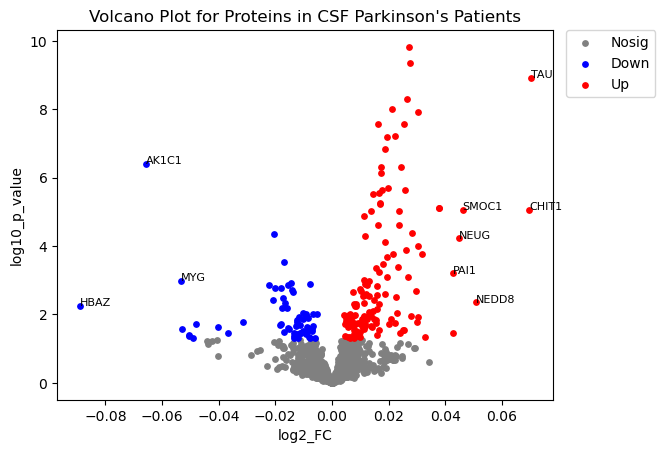

In [38]:
Up_AD_MCI = df_volcano_AD_MCI.loc[(df_volcano_AD_MCI.log2_FC>0)&(df_volcano_AD_MCI.log10_p_value>1.3)]
Down_AD_MCI = df_volcano_AD_MCI.loc[(df_volcano_AD_MCI.log2_FC<0)&(df_volcano_AD_MCI.log10_p_value>1.3)]
Nosig_AD_MCI = df_volcano_AD_MCI.loc[(df_volcano_AD_MCI.log10_p_value<=1.3)]

fig, ax = plt.subplots()

# plot the different data groups as different colors
ax.scatter(Nosig_AD_MCI['log2_FC'], Nosig_AD_MCI['log10_p_value'], color='grey', label='Nosig', s=15)
ax.scatter(Down_AD_MCI['log2_FC'], Down_AD_MCI['log10_p_value'], color='blue', label='Down', s=15)
ax.scatter(Up_AD_MCI['log2_FC'], Up_AD_MCI['log10_p_value'], color='red', label='Up', s=15)

ax.set_title("Volcano Plot for Proteins in CSF Parkinson's Patients")
ax.set_xlabel("log2_FC")
ax.set_ylabel("log10_p_value")

ax.legend(loc='center right', bbox_to_anchor=(1.22,0.91), ncol=1)

for i in range(df.shape[0]):
    ax.text(x=df.col1[i],y=df.col2[i],s=df.col3[i], size=8)

plt.savefig('plot1', bbox_inches='tight')

In [40]:
for i in range(0,df_volcano_PD.shape[0]):
    if df_volcano_PD.log2_FC[i] < -0.03 and df_volcano_PD.log10_p_value[i] > 1.5:
        log2_FC=df_volcano_PD.log2_FC[i]
        log10_p_value=df_volcano_PD.log10_p_value[i]
        s=df_volcano_PD.protein[i]
        print(log2_FC, log10_p_value, s)

for i in range(0,df_volcano_PD.shape[0]):
    if df_volcano_PD.log2_FC[i] > 0.03 and df_volcano_PD.log10_p_value[i] > 1.5:
        log2_FC=df_volcano_PD.log2_FC[i]
        log10_p_value=df_volcano_PD.log10_p_value[i]
        s=df_volcano_PD.protein[i]
        print(log2_FC, log10_p_value, s)

-0.030344670329137603 1.9291434553195062 CAH10
-0.030793095646763247 4.3119590167241 AGRB1
0.036761296123075625 1.6565920725932615 LV861
0.03809265572569895 1.5837418571448114 LV545
0.03566479239364839 2.01637069240143 HLAA
0.039617653678374935 1.6652088972784673 K1C9


In [41]:
data = {'col1': [-0.030344670329137603, -0.030793095646763247, 0.036761296123075625, 0.03809265572569895, 0.03566479239364839, 0.039617653678374935],
        'col2': [1.9291434553195062, 4.3119590167241, 1.6565920725932615, 1.5837418571448114, 2.01637069240143, 1.6652088972784673],
        'col3': ['CAH10', 'AGRB1', 'LV861', 'LV545', 'HLAA', 'K1C9']}
df = pd.DataFrame(data)

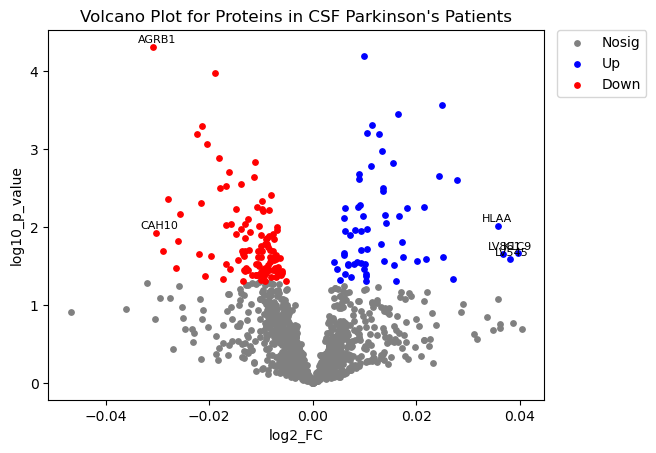

In [42]:
Up_PD = df_volcano_PD.loc[(df_volcano_PD.log2_FC>0)&(df_volcano_PD.log10_p_value>1.3)]
Down_PD = df_volcano_PD.loc[(df_volcano_PD.log2_FC<0)&(df_volcano_PD.log10_p_value>1.3)]
Nosig_PD =df_volcano_PD.loc[(df_volcano_PD.log10_p_value<=1.3)]

fig, ax = plt.subplots()

# plot the different data groups as different colors
ax.scatter(Nosig_PD['log2_FC'], Nosig_PD['log10_p_value'], color='grey', label='Nosig', s=15)
ax.scatter(Up_PD['log2_FC'], Up_PD['log10_p_value'], color='blue', label='Up', s=15)
ax.scatter(Down_PD['log2_FC'], Down_PD['log10_p_value'], color='red', label='Down', s=15)

ax.set_title("Volcano Plot for Proteins in CSF Parkinson's Patients")
ax.set_xlabel("log2_FC")
ax.set_ylabel("log10_p_value")

ax.legend(loc='center right', bbox_to_anchor=(1.22,0.91), ncol=1)

for i in range(df.shape[0]):
    ax.text(x=df.col1[i]-0.003,y=df.col2[i]+0.05,s=df.col3[i], size=8)

plt.savefig('plot2', bbox_inches='tight')

In [43]:
for i in range(0,df_volcano_PD_MCI.shape[0]):
    if df_volcano_PD_MCI.log2_FC[i] < -0.04 and df_volcano_PD_MCI.log10_p_value[i] > 2:
        log2_FC=df_volcano_PD_MCI.log2_FC[i]
        log10_p_value=df_volcano_PD_MCI.log10_p_value[i]
        s=df_volcano_PD_MCI.protein[i]
        print(log2_FC, log10_p_value, s)

for i in range(0,df_volcano_PD_MCI.shape[0]):
    if df_volcano_PD_MCI.log2_FC[i] > 0.04 and df_volcano_PD_MCI.log10_p_value[i] > 2:
        log2_FC=df_volcano_PD_MCI.log2_FC[i]
        log10_p_value=df_volcano_PD_MCI.log10_p_value[i]
        s=df_volcano_PD_MCI.protein[i]
        print(log2_FC, log10_p_value, s)

-0.04236961829364891 3.068228521607989 TRFM
-0.05717004168257422 4.519161941886108 AK1C1
-0.046101051149262745 2.1235843669655075 CNTP5
-0.04020621989765122 3.7394581801222992 CAH10
-0.041343190383039644 2.400928301313936 PCDGL
0.04378912010067343 2.3201245034112437 PAI1
0.04883730144424974 2.418153213032676 ERAP2


In [44]:
data = {'col1': [-0.04236961829364891, -0.05717004168257422, -0.046101051149262745, -0.04020621989765122, -0.041343190383039644, 0.04378912010067343, 0.04883730144424974],
        'col2': [3.068228521607989, 4.519161941886108, 2.1235843669655075, 3.7394581801222992, 2.400928301313936, 2.3201245034112437, 2.418153213032676],
        'col3': ['TRFM', 'AK1C1', 'CNTP5', 'CAH10', 'PCDGL', 'PAI1', 'ERAP2']}
df = pd.DataFrame(data)

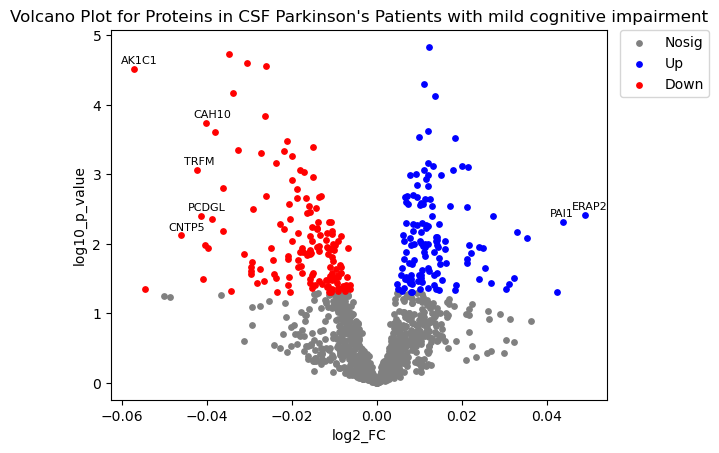

In [45]:
Up_PD_MCI = df_volcano_PD_MCI.loc[(df_volcano_PD_MCI.log2_FC>0)&(df_volcano_PD_MCI.log10_p_value>1.3)]
Down_PD_MCI = df_volcano_PD_MCI.loc[(df_volcano_PD_MCI.log2_FC<0)&(df_volcano_PD_MCI.log10_p_value>1.3)]
Nosig_PD_MCI = df_volcano_PD_MCI.loc[(df_volcano_PD_MCI.log10_p_value<=1.3)]

fig, ax = plt.subplots()

# plot the different data groups as different colors
ax.scatter(Nosig_PD_MCI['log2_FC'], Nosig_PD_MCI['log10_p_value'], color='grey', label='Nosig' , s=15)
ax.scatter(Up_PD_MCI['log2_FC'], Up_PD_MCI['log10_p_value'], color='blue', label='Up', s=15)
ax.scatter(Down_PD_MCI['log2_FC'], Down_PD_MCI['log10_p_value'], color='red', label='Down' , s=15)

ax.set_title("Volcano Plot for Proteins in CSF Parkinson's Patients with mild cognitive impairment")
ax.set_xlabel("log2_FC")
ax.set_ylabel("log10_p_value")

ax.legend(loc='center right', bbox_to_anchor=(1.22,0.91), ncol=1)

for i in range(df.shape[0]):
    ax.text(x=df.col1[i]-0.003,y=df.col2[i]+0.07,s=df.col3[i], size=8)

plt.savefig('plot3', bbox_inches='tight')